**DSA 210 Project Phase 2**

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [237]:
full_df = pd.read_csv('full_df_with_tmdb_profit.csv')
# Step 1: Drop columns where *all values* are NaN
full_df_cleaned = full_df.dropna(axis=1, how='all')

# Step 2: Drop rows where *any value* is NaN
full_df_cleaned = full_df_cleaned.dropna(axis=0, how='any')
full_df = full_df_cleaned

**NUMERICAL DISTRIBUTIONS**

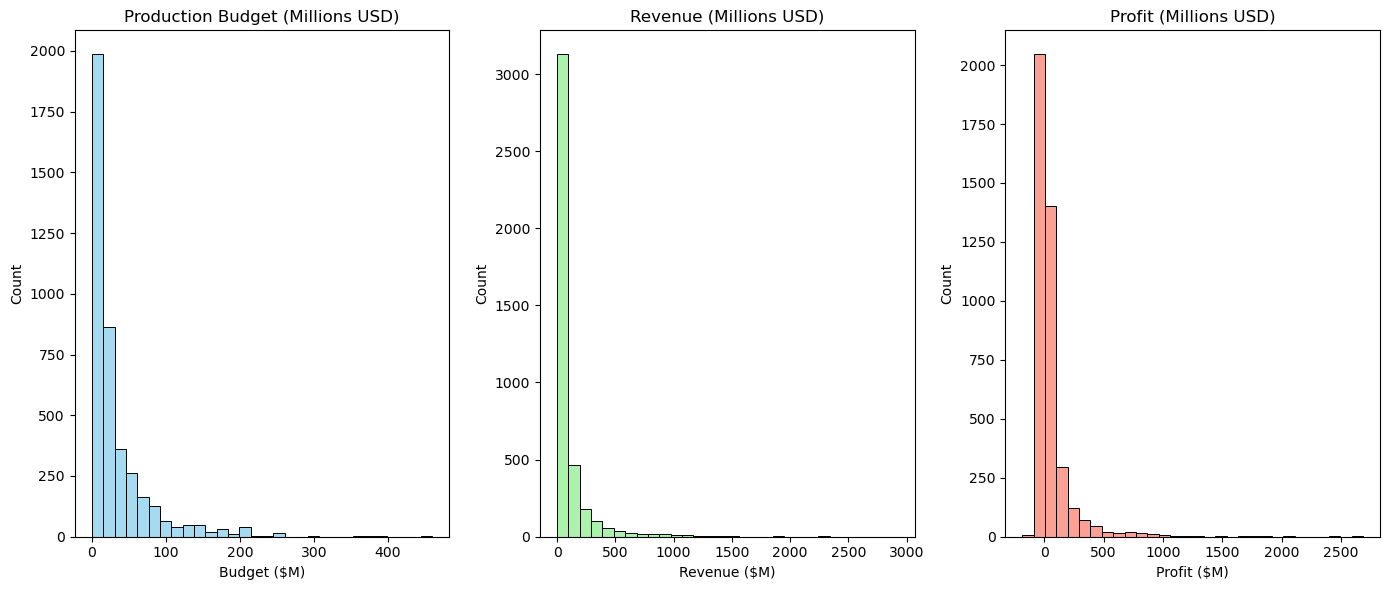

In [238]:
#Numerical distributions
# Budget & Revenue Histograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(full_df['tmdb_budget'] / 1e6, bins=30, color='skyblue')
plt.title("Production Budget (Millions USD)")
plt.xlabel("Budget ($M)")

plt.subplot(1, 3, 2)
sns.histplot(full_df['tmdb_revenue'] / 1e6, bins=30, color='lightgreen')
plt.title("Revenue (Millions USD)")
plt.xlabel("Revenue ($M)")

plt.subplot(1, 3, 3)
sns.histplot(full_df['tmdb_profit'] / 1e6, bins=30, color='salmon')
plt.title("Profit (Millions USD)")
plt.xlabel("Profit ($M)")

plt.tight_layout()
plt.show()

**A. Budget & Revenue Insights**

A1. Budget vs Revenue (Regression Line)

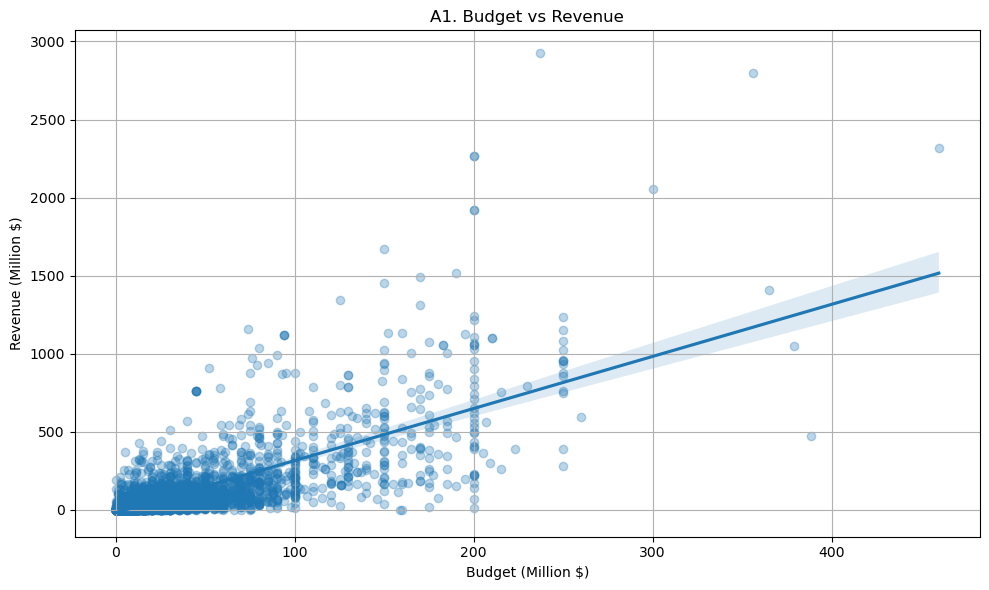

In [239]:
plt.figure(figsize=(10, 6))
sns.regplot(data=full_df, x=full_df['tmdb_budget'] / 1e6, y=full_df['tmdb_revenue'] / 1e6, scatter_kws={'alpha':0.3})
plt.title("A1. Budget vs Revenue")
plt.xlabel("Budget (Million $)")
plt.ylabel("Revenue (Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()

A2. Profit Distribution

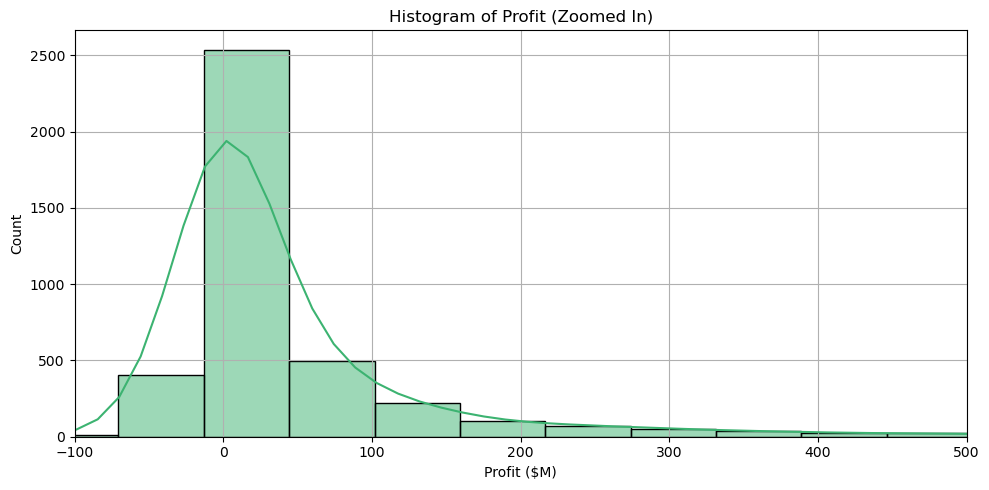

In [240]:
    plt.figure(figsize=(10, 5))
sns.histplot(full_df['tmdb_profit'] / 1e6, bins=50, kde=True, color='mediumseagreen')
plt.xlim(-100, 500)  # Adjust if needed
plt.title("Histogram of Profit (Zoomed In)")
plt.xlabel("Profit ($M)")
plt.grid(True)
plt.tight_layout()
plt.show()

A3. Bubble Plot — Budget vs Revenue with IMDb Rating

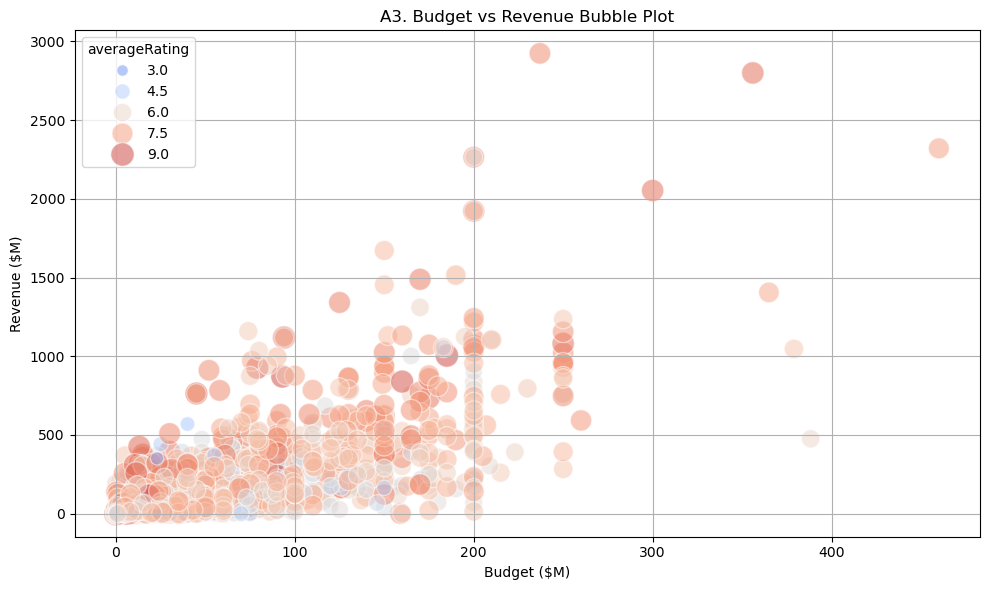

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=full_df,
    x=full_df['tmdb_budget'] / 1e6,
    y=full_df['tmdb_revenue'] / 1e6,
    size='averageRating',
    hue='averageRating',
    palette='coolwarm',
    sizes=(20, 300),
    alpha=0.5
)
plt.xlabel("Budget ($M)")
plt.ylabel("Revenue ($M)")
plt.title("A3. Budget vs Revenue Bubble Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

**B. Ratings and Runtime**

B1. IMDb Rating Distribution

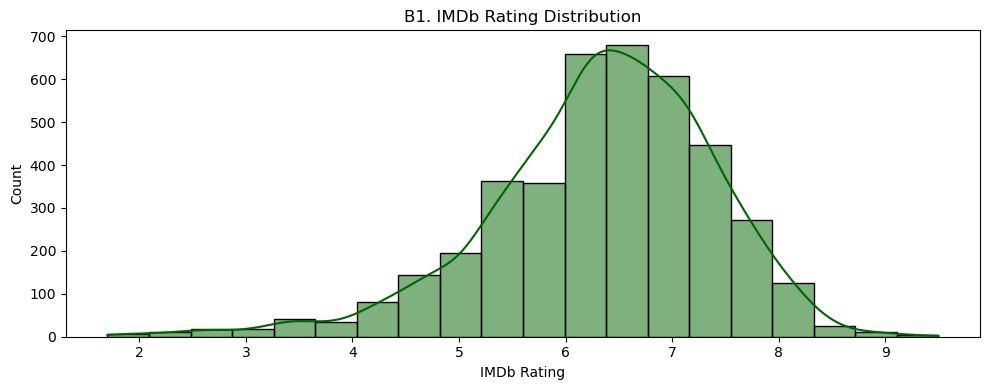

In [242]:
plt.figure(figsize=(10, 4))
sns.histplot(full_df['averageRating'].dropna(), bins=20, kde=True, color="darkgreen")
plt.title("B1. IMDb Rating Distribution")
plt.xlabel("IMDb Rating")
plt.tight_layout()
plt.show()

B2. Runtime Distribution

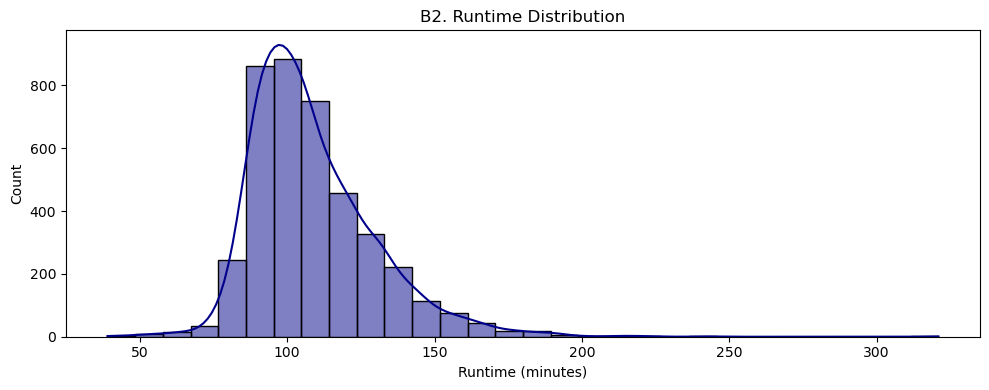

In [243]:
plt.figure(figsize=(10, 4))
sns.histplot(full_df['runtimeMinutes'].dropna(), bins=30, kde=True, color="darkblue")
plt.title("B2. Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.tight_layout()
plt.show()

B3. Runtime vs IMDb Rating

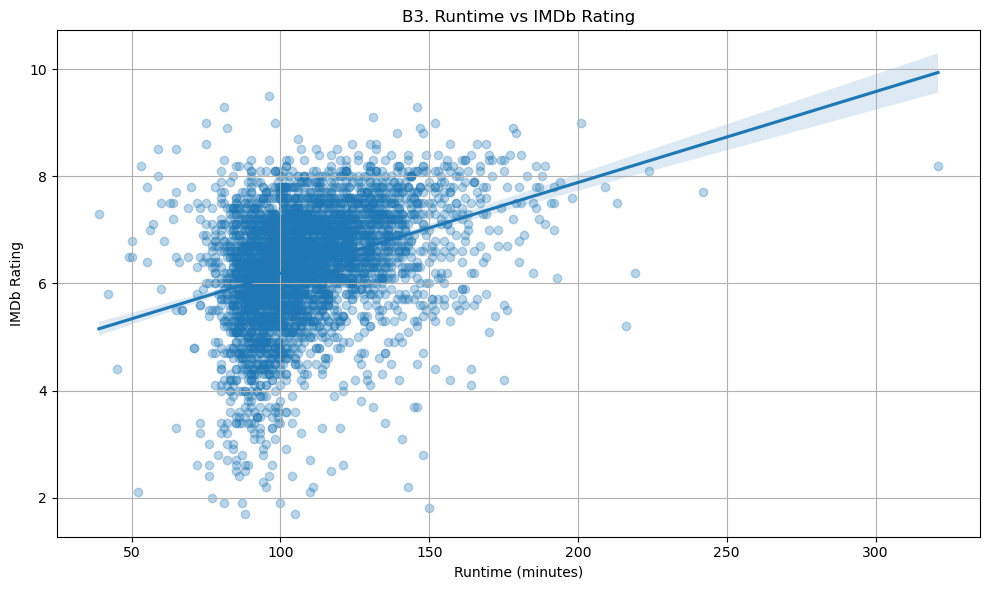

In [244]:
plt.figure(figsize=(10, 6))
sns.regplot(data=full_df, x='runtimeMinutes', y='averageRating', scatter_kws={'alpha':0.3})
plt.title("B3. Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

**C. Time Series**


C1. Average Rating by Year

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/952130729.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=full_df['releaseYear'], y=full_df['averageRating'], estimator='mean', ci=None)


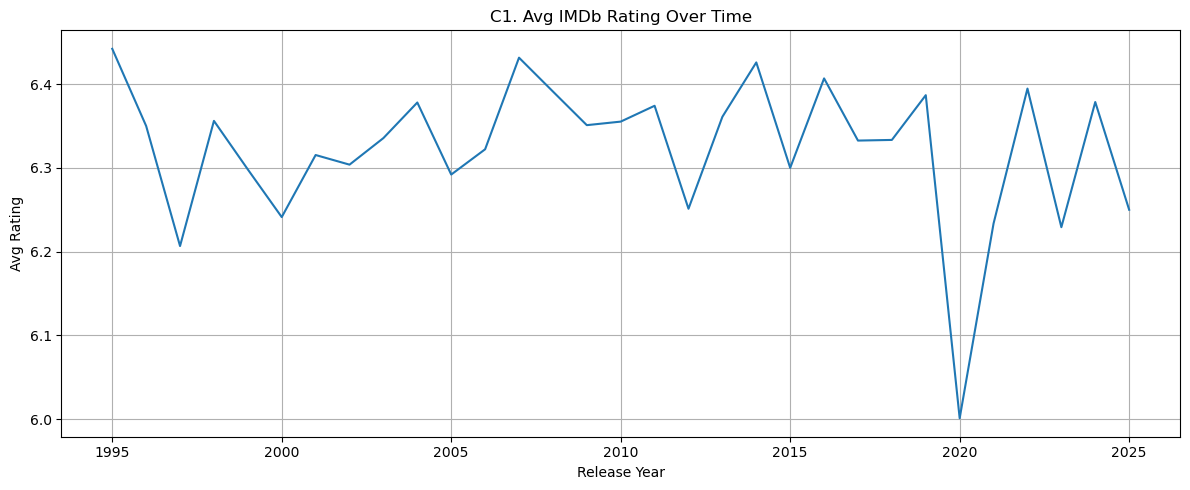

In [245]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=full_df['releaseYear'], y=full_df['averageRating'], estimator='mean', ci=None)
plt.title("C1. Avg IMDb Rating Over Time")
plt.xlabel("Release Year")
plt.ylabel("Avg Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

C2. Average Budget by Year

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/718023114.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=full_df['releaseYear'], y=full_df['tmdb_budget'] / 1e6, estimator='mean', ci=None)


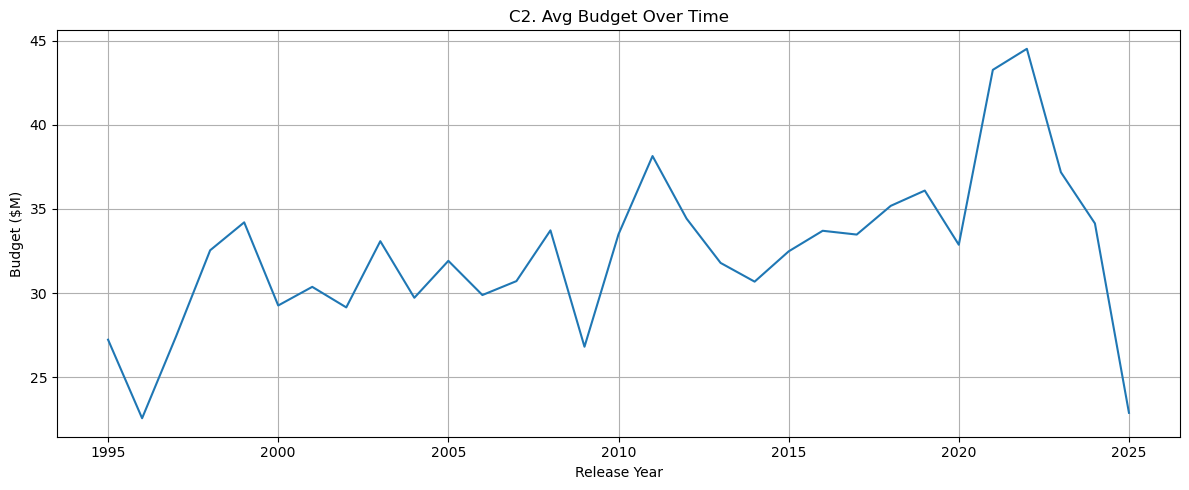

In [246]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=full_df['releaseYear'], y=full_df['tmdb_budget'] / 1e6, estimator='mean', ci=None)
plt.title("C2. Avg Budget Over Time")
plt.xlabel("Release Year")
plt.ylabel("Budget ($M)")
plt.grid(True)
plt.tight_layout()
plt.show()

C3. Number of Movies per Year

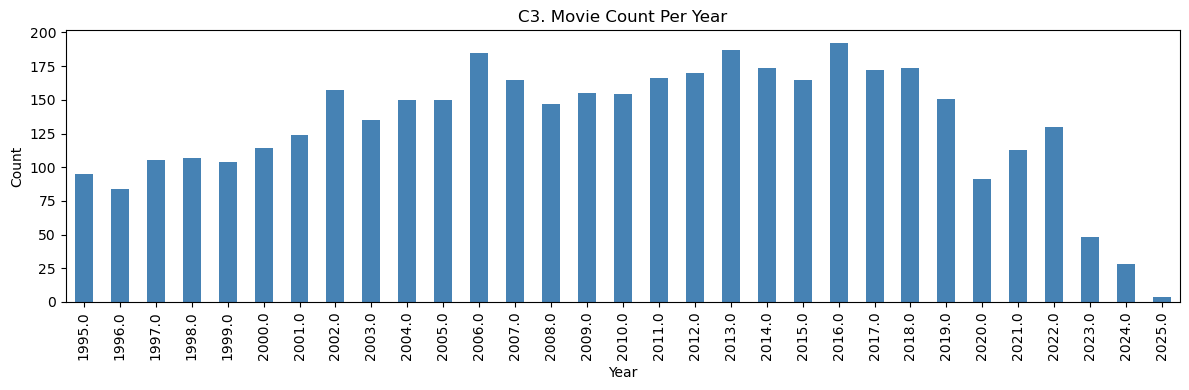

In [247]:
plt.figure(figsize=(12, 4))
full_df['releaseYear'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("C3. Movie Count Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Top 10 Directors by Average Profit

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/596117389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values / 1e6, y=top_directors.index, palette="crest")


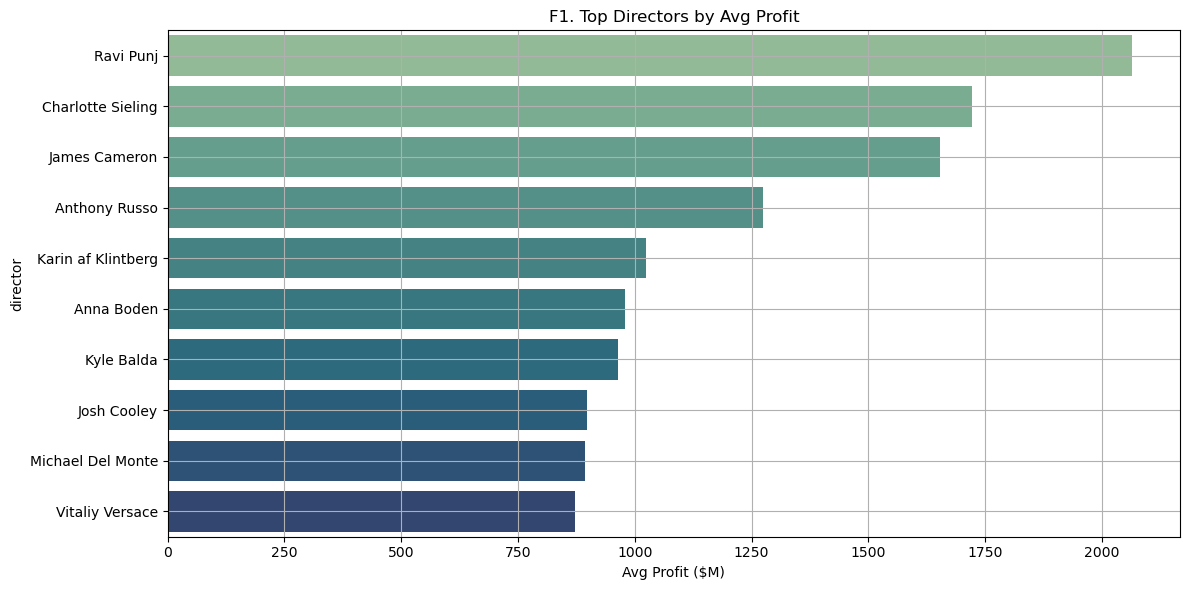

In [248]:
top_directors = full_df.groupby('director')['tmdb_profit'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values / 1e6, y=top_directors.index, palette="crest")
plt.title("F1. Top Directors by Avg Profit")
plt.xlabel("Avg Profit ($M)")
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Heatmap

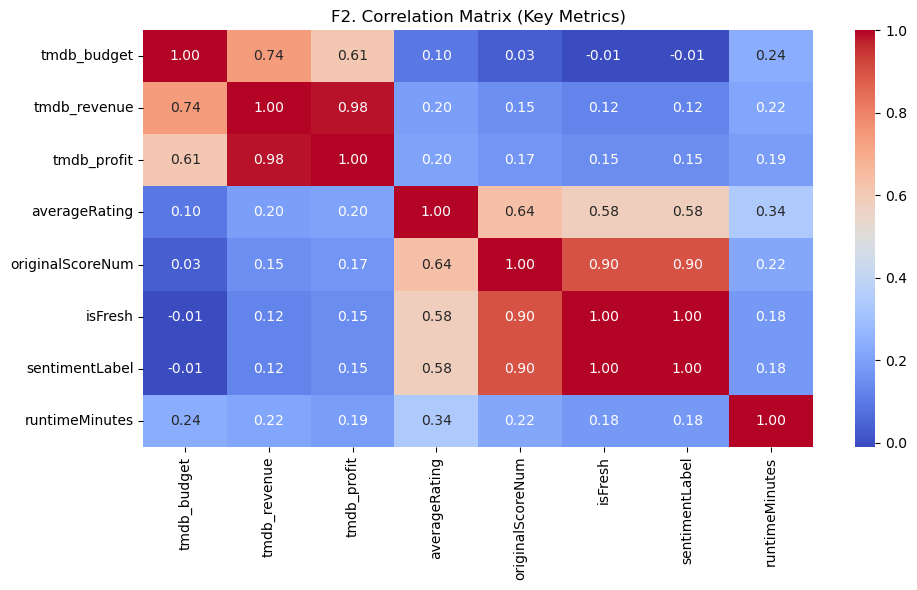

In [249]:
plt.figure(figsize=(10, 6))
sns.heatmap(full_df[['tmdb_budget', 'tmdb_revenue', 'tmdb_profit',
                     'averageRating', 'originalScoreNum', 'isFresh',
                     'sentimentLabel', 'runtimeMinutes']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("F2. Correlation Matrix (Key Metrics)")
plt.tight_layout()
plt.show()

Profit Distribution by IMDb Rating Groups

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/3247334627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_df, x='rating_group', y=full_df['tmdb_profit'] / 1e6, palette='Spectral')


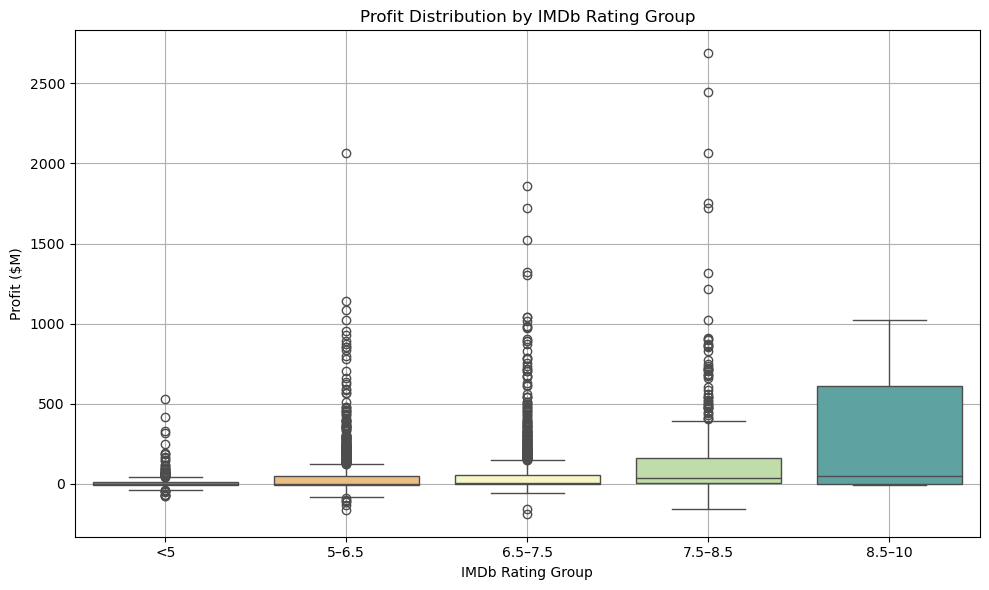

In [250]:
# Bin IMDb ratings
full_df['rating_group'] = pd.cut(full_df['averageRating'], bins=[0, 5, 6.5, 7.5, 8.5, 10], labels=["<5", "5–6.5", "6.5–7.5", "7.5–8.5", "8.5–10"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='rating_group', y=full_df['tmdb_profit'] / 1e6, palette='Spectral')
plt.title("Profit Distribution by IMDb Rating Group")
plt.xlabel("IMDb Rating Group")
plt.ylabel("Profit ($M)")
plt.grid(True)
plt.tight_layout()
plt.show()


 IMDb Rating by Top 8 Most Frequent Directors

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/3166789518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_director_df, x='director', y='averageRating', palette='pastel')


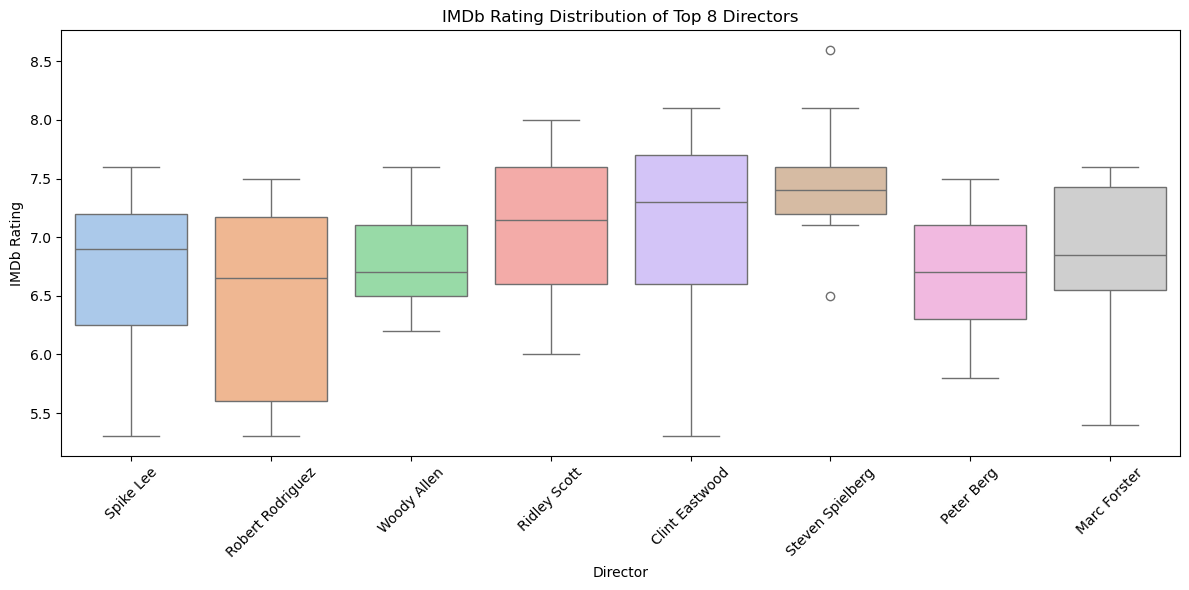

In [251]:
top_directors = full_df['director'].value_counts().head(8).index
top_director_df = full_df[full_df['director'].isin(top_directors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_director_df, x='director', y='averageRating', palette='pastel')
plt.title("IMDb Rating Distribution of Top 8 Directors")
plt.xlabel("Director")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Profit by RT Score Buckets

/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_8125/4077565133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_df, x='rt_score_group', y=full_df['tmdb_profit'] / 1e6, palette='Spectral')


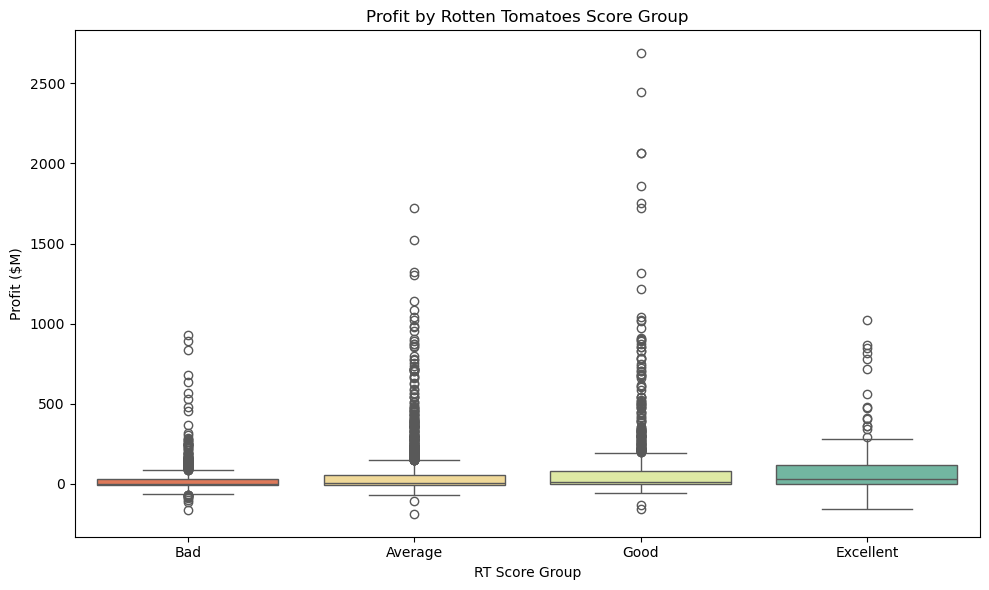

In [252]:
full_df['rt_score_group'] = pd.cut(full_df['originalScoreNum'], bins=[0, 0.5, 0.7, 0.85, 1.0], labels=["Bad", "Average", "Good", "Excellent"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='rt_score_group', y=full_df['tmdb_profit'] / 1e6, palette='Spectral')
plt.title("Profit by Rotten Tomatoes Score Group")
plt.xlabel("RT Score Group")
plt.ylabel("Profit ($M)")
plt.tight_layout()
plt.show()